In [26]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from math import ceil
import numpy as np
import pickle
import pandas as pd

In [28]:
#fname = '528653157d4320141.pickle'
#fname = '528664172d33464026.pickle'
fname = '528820438d371897.pickle'
#fname = '528910872d3934581.pickle'
#fname = 'grb171004857.pickle'

In [29]:
def simple_exponential_smoothing(signal, α):
    
    output = [signal[0:20].mean()]
    estimate = signal[0:20].mean()
    
    for point in signal[1:]:
        estimate = α*(estimate) + (1-α)*point
        output.append(estimate)
    
    return output

In [30]:
def e_detector_cusum_var(data, lambda_vec):
    N = len(data)
    E = np.zeros((N, N))
    for j in range(N):
        for i in range(j, N):
            l = max(lambda_vec[i], np.mean(data[j:i]))
            if i == 0 and j == 0:
                E[j, i] = data[i] * np.log(l / lambda_vec[i]) - l + lambda_vec[i]
            else:
                E[j, i] = E[j, i - 1] + data[i] * np.log(l / lambda_vec[i]) - l + lambda_vec[i]
    
    return np.apply_along_axis(np.max, 0, E)

def e_detector_sr_var(data, lambda_vec):
    N = len(data)
    E = np.zeros((N, N))
    for j in range(N):
        for i in range(j, N):
            l = max(lambda_vec[i], np.mean(data[j:i]))
            if i == 0 and j == 0:
                E[j, i] = data[i] * np.log(l / lambda_vec[i]) - l + lambda_vec[i]
            else:
                E[j, i] = E[j, i - 1] + data[i] * np.log(l / lambda_vec[i]) - l + lambda_vec[i]
    
    return np.apply_along_axis(np.sum, 0, E)

/Users/aytijhyasaha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aytijhyasaha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


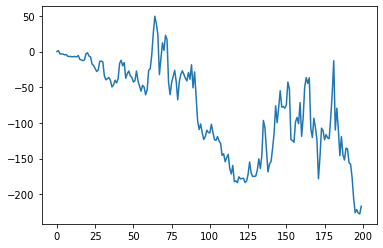

In [31]:
def e_detector_sr(data, lmbda):
    N = len(data)
    E = np.zeros((N, N))
    for j in range(N):
        for i in range(j, N):
            l = max(lmbda, np.mean(data[j:i]))
            if i == 0 and j == 0:
                E[j, i] = data[i] * np.log(l / lmbda) - l + lmbda
            else:
                E[j, i] = E[j, i - 1] + data[i] * np.log(l / lmbda) - l + lmbda
    return np.sum(E, axis=0)

data = np.random.poisson(300, 200)

plt.plot(e_detector_sr(data, 300))
plt.show()

/Users/aytijhyasaha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aytijhyasaha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/aytijhyasaha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aytijhyasaha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


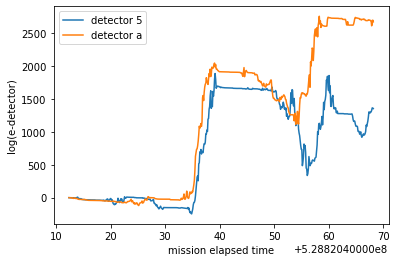

In [32]:
with open(f'{fname}', 'rb') as handle:
  d = pickle.load(handle)

data = pd.DataFrame(index=d[0][:-1])
data.index.rename("mission elapsed time", inplace=True)

times = pd.Series(data.index)

for key in d[1].keys():
  data[key] = d[1][key]

signal_1 = data.iloc[:, 1] #first detector, 50-300keV
signal_2 = data.iloc[:, 4] #second detector, 50-300keV

background_1 = simple_exponential_smoothing(signal_1.values, α=0.94)[:-40]
background_2 = simple_exponential_smoothing(signal_2.values, α=0.94)[:-40]

raw_data_1 = signal_1.values[40:]
raw_data_2 = signal_2.values[40:]

figs, axs = plt.subplots()

axs.plot(times[40:],e_detector_sr_var(raw_data_1,background_1), color="C0", label=f"detector {data.columns[1][1]}")
axs.plot(times[40:],e_detector_sr_var(raw_data_2,background_2), color="C1", label=f"detector {data.columns[4][1]}")


#axs.plot(times[40:],e_detector_sr(raw_data_1,np.median(background_1)), color="C0", label=f"detector {data.columns[1][1]}")
#axs.plot(times[40:],e_detector_sr(raw_data_2,np.median(background_2)), color="C1", label=f"detector {data.columns[4][1]}")
plt.ylabel("log(e-detector)")
plt.xlabel("mission elapsed time")
plt.legend()
plt.show()

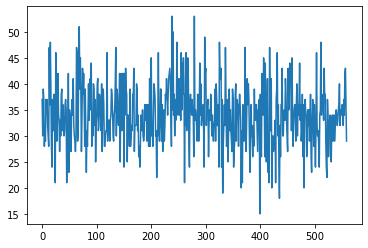

In [33]:
plt.plot(raw_data_1)
plt.show()

In [23]:
print(background_1)

[31.45, 31.003, 30.942819999999998, 30.646250799999997, 30.067475751999996, 30.48342720688, 31.0544215744672, 31.471156279999168, 31.80288690319922, 32.11471368900727, 32.22783086766683, 31.854161015606824, 31.562911354670415, 31.76913667339019, 31.962988472986776, 32.26520916460757, 31.949296614731114, 32.072338817847246, 31.58799848877641, 31.492718579449825, 31.403155464682836, 31.138966136801866, 31.130628168593756, 31.722790478478128, 31.439423049769438, 31.353057666783272, 31.091874206776275, 31.1463617543697, 30.95758004910752, 31.74012524616107, 31.99571773139141, 31.875974667507922, 31.583416187457445, 32.028411216209996, 32.14670654323739, 32.01790415064315, 32.25682990160456, 31.881420107508287, 32.008534901057786, 32.24802280699432, 32.23314143857466, 32.15915295226018, 31.96960377512457, 32.211427548617095, 31.65874189570007, 30.95921738195807, 30.241664339040582, 30.28716447869815, 30.68993460997626, 30.768538533377683, 31.56242622137502, 32.068680648092524, 32.6045598092

In [24]:
print(background_2)

[26.8, 26.992, 27.052480000000003, 27.0493312, 26.446371327999998, 26.179589048319997, 25.6888137054208, 25.64748488309555, 26.388635790109817, 26.125317642703227, 25.997798584141034, 26.657930669092572, 26.61845482894702, 26.9413475392102, 27.54486668685759, 27.752174685646136, 27.287044204507367, 27.149821552236922, 27.080832259102706, 27.195982323556546, 27.124223384143153, 26.636769981094563, 26.83856378222889, 26.728249955295155, 26.744554957977446, 26.5198816604988, 26.12868876086887, 26.600967435216738, 26.744909389103736, 26.64021482575751, 26.18180193621206, 26.47089382003934, 26.502640190836978, 26.952481779386762, 27.015332872623553, 26.53441290026614, 26.92234812625017, 26.56700723867516, 26.112986804354648, 26.28620759609337, 26.869035140327767, 26.9368930319081, 27.180679449993615, 27.109838682994, 26.983248362014358, 27.044253460293497, 27.521598252675886, 27.310302357515333, 26.99168421606441, 27.052183163100544, 26.86905217331451, 26.756909042915638, 26.291494500340697

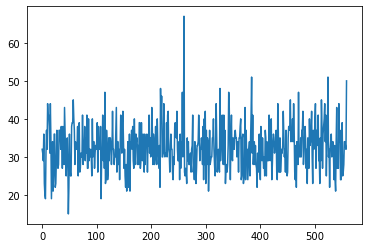

In [25]:
plt.plot(raw_data_1)
plt.show()